# Example Karstolution run

Users need to provide their own forcing file in this example

In [9]:
from __future__ import print_function, division, unicode_literals
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io

In [2]:
%matplotlib inline

In [3]:
# import seaborn if it's available
try:
    import seaborn as sns
    
except ImportError:
    pass # no big deal otherwise

In [4]:
# this lets us use karstolution without installing it
import sys
import os
sys.path.append(os.path.abspath('..'))

In [5]:
from Karstolution import karstolution

## Check widgets are working

In [6]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


IntSlider(value=7, continuous_update=False, description=u'Test:', max=10)

## Time-dependent forcing

Upload a file to work with

In [10]:
# Boilerplate
import io
import fileupload


def upload():
    """Create an upload files button that prints the file name and file size.
    """

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(filename, len(decoded.read()) / 2 **10))

    _upload_widget.observe(_cb, names='data')
    
    return _upload_widget

up = upload()
up

FileUploadWidget(label=u'Browse', _dom_classes=('widget_item', 'btn-group'))

In [ ]:
sio = io.StringIO(up.data)
df_input = pd.read_csv(sio)
df_input.head()

## Static configuration

The configuration is passed to the main model routine as a `dict`, i.e. a Python dictionary.
A convenient way of soring the configuration is as a [yaml](http://yaml.org/) formatted file.
Here's an example (the Texas case):

```yaml
f1 : 0.2
f3 : 0.008
f5 : 0.005
f6 : 0.002
f7 : 1.0
k_diffuse : 0.008
f8 : 0.001
i : 0.5
j : 0.25
k : 0.25
m : 0.75
n : 0.25
k_eevap : 0.0
k_d18o_soil : 0.03
k_d18o_epi : 0.0
soilstore : 200.0
epicap : 400.0
ovicap : 100.0
epikarst : 400.0
ks1 : 400.0
ks2 : 200.0
lambda_weibull : 1.5
k_weibull : 1.0
mixing_parameter_phi : 1.0
# these parameters are forced by a climatological monthly mean
# (so there needs to be a list of 12 values, January-December)
monthly_forcing : 
  drip_pco2 : [4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0]
  cave_pco2 : [1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0]
  rel_humidity : [0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95]
  ventilation : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  cave_temp : [10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0]
  drip_interval : [100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0]
initial_conditions :
  # initial level in each store
  soil : 50.0
  epikarst : 100.0
  ks1 : 230.0
  ks2 : 50.0
  diffuse : 30.0
  # initial oxygen-18 composition in each store (d18O, permille VSMOW)
  d18o_soil : -5.0
  d18o_epikarst : -4.0
  d18o_ks1 : -5.0
  d18o_ks2 : -4.0
  d18o_prevrain : -5.0
  d18o_diffuse : -4.0
```

In [6]:
# Make changes to parameters here

yaml_config = """
f1 : 0.2
f3 : 0.008
f5 : 0.005
f6 : 0.002
f7 : 1.0
k_diffuse : 0.008
f8 : 0.001
i : 0.5
j : 0.25
k : 0.25
m : 0.75
n : 0.25
k_eevap : 0.0
k_d18o_soil : 0.03
k_d18o_epi : 0.0
soilstore : 200.0
epicap : 400.0
ovicap : 100.0
epikarst : 400.0
ks1 : 400.0
ks2 : 200.0
lambda_weibull : 1.5
k_weibull : 1.0
mixing_parameter_phi : 1.0
monthly_forcing : 
  # these parameters are forced with a climatological mean
  drip_pco2 : [4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0]
  cave_pco2 : [1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0]
  rel_humidity : [0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95]
  ventilation : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  cave_temp : [10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0]
  drip_interval : [100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0]
initial_conditions :
  # initial level in each store
  soil : 50.0
  epikarst : 100.0
  ks1 : 230.0
  ks2 : 50.0
  diffuse : 30.0
  # initial oxygen-18 composition in each store (d18O, permille VSMOW)
  d18o_soil : -5.0
  d18o_epikarst : -4.0
  d18o_ks1 : -5.0
  d18o_ks2 : -4.0
  d18o_prevrain : -5.0
  d18o_diffuse : -4.0"""

In [7]:
config=yaml.safe_load(yaml_config)

## Time-varying input

The time-varying inputs (with a monthly timestep) are passed to the model as a pandas.DataFrame.  Load one from a csv file...

In [8]:
df_input = pd.read_csv('../example/input.csv')

In [9]:
df_input.head()

,tt,mm,evpt,prp,tempp,d18o
0,1,1,63.878443,15.236226,19.649749,-3.400600
1,2,2,33.334600,14.741009,17.888605,-2.826333
2,3,3,18.893370,17.004427,15.940097,-3.625750
3,4,4,44.527913,43.030678,14.215880,-4.285571
4,5,5,40.456649,65.882121,12.940891,-4.630999


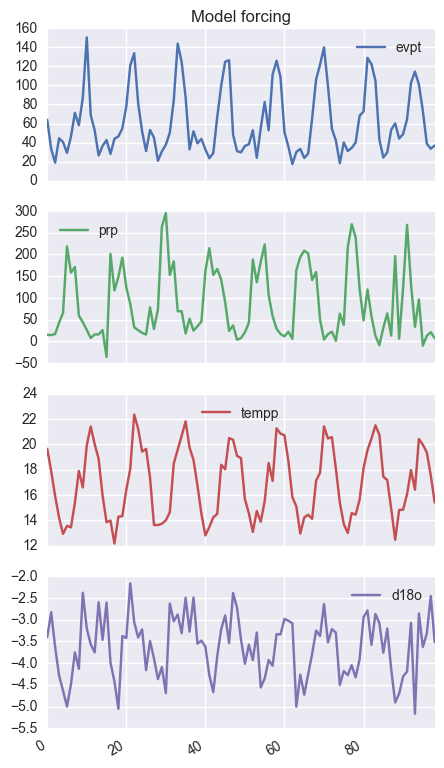

In [10]:
ax = df_input.drop(['tt','mm'], axis=1).plot(subplots=True)
ax[0].figure.set_size_inches([5,10])
ax[0].set_title('Model forcing')

In [11]:
model_output = karstolution(config, df_input, calculate_drip=True)

In [12]:
# aside: check that the model output matches the old version
# -- this comparison looks good (there were some problems, but all good now)
df_ref = pd.read_csv('../example/output.csv')
# difference between current run and a reference
(model_output - df_ref).abs().max(axis=0)/df_ref.mean(axis=0).abs()

tt                0.000000e+00
mm                0.000000e+00
f1                6.328514e-16
f3                1.514087e-16
f4                4.317070e-16
f5                2.211600e-16
f6                1.621482e-16
f7                9.394623e-16
soilstor          6.328514e-16
epxstor           1.612309e-16
kststor1          1.463686e-16
kststor2          1.663725e-16
soil18o           4.135951e-16
epx18o            3.095792e-16
kststor118o       4.827924e-16
kststor218o       2.817023e-16
dpdf[0]           3.052595e-16
stal1d18o         8.738532e-13
stal2d18o         2.926516e-13
stal3d18o         3.411039e-13
stal4d18o         1.071368e-12
stal5d18o         5.356573e-13
drip_int_stal1    0.000000e+00
drip_int_stal4    0.000000e+00
drip_int_stal3    0.000000e+00
drip_int_stal2    0.000000e+00
drip_int_stal5    0.000000e+00
cave_temp         5.760135e-16
dtype: float64

## Plot results

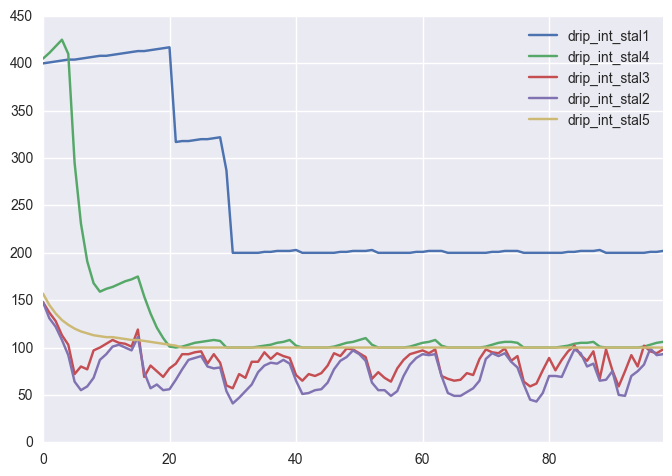

In [16]:
drip_cols = [itm for itm in model_output.columns if itm.startswith('drip')]
model_output[drip_cols].plot()

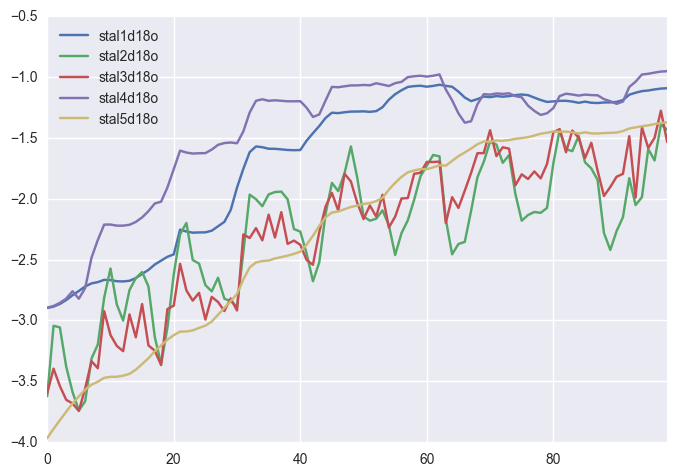

In [17]:
stal_cols = [itm for itm in model_output.columns if itm.startswith('stal')]
model_output[stal_cols].plot()

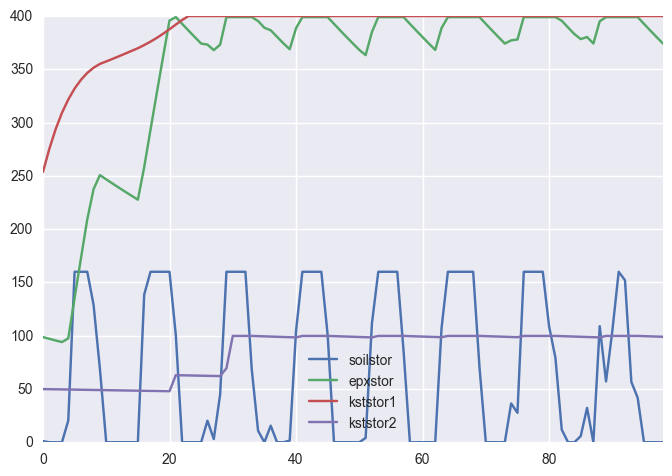

In [18]:
store_cols = ['soilstor', 'epxstor', 'kststor1','kststor2']
model_output[store_cols].plot()